In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
model_2_data = pd.read_csv(data_folder+'model_2.csv',dtype={'PIN': 'string'}, index_col=0)
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

In [3]:
model_2_data

,LogSalePrice,LogSqFt,is_waterfront,PIN
0,13.235692,3.285557,0,2130430120
1,12.983101,3.295567,0,9406520630
2,13.017003,3.033424,0,1402810020
3,12.170445,3.245513,0,1245500098
4,13.199324,3.093422,0,7973202320
...,...,...,...,...
28203,14.001990,3.459392,0,9290850760
28204,12.999065,3.155336,0,4059400095
28205,13.429848,3.356026,0,3816700025
28206,13.521139,3.352183,0,6150200505


# Does having a porch affect home value in a way that helps our model?

In [4]:
data = pd.merge(model_2_data, res_bldg, how='inner', on='PIN')

data['has_open_porch'] = (data['SqFtOpenPorch'] != 0).astype('int')
data.has_open_porch.sum()

14824

In [5]:
data.SqFtOpenPorch

0        180
1         45
2        110
3          0
4          0
        ... 
28203    130
28204      0
28205      0
28206    450
28207      0
Name: SqFtOpenPorch, Length: 28208, dtype: int64

In [6]:
model_3_data = data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront', 'SqFtOpenPorch', 'PIN']]


# Modeling

In [7]:
test_df = model_3_data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront', 'SqFtOpenPorch']]

In [8]:
cm_functions.get_fsm(test_df)

Rsquared: 0.35114164754398336
BETA values:
Intercept        8.173917
LogSqFt          1.586262
is_waterfront    0.405475
SqFtOpenPorch    0.000202
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     5088.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:58:47   Log-Likelihood:                -15775.
No. Observations:               28208   AIC:                         3.156e+04
Df Residuals:                   28204   BIC:                         3.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
         

## Because this doesn't seem to help our model, I'm going to look at the total porch sq ft combined

In [9]:
data['porch_sq_ft'] = data.SqFtEnclosedPorch + data.SqFtOpenPorch
data['has_open_porch'] = (data['porch_sq_ft'] != 0).astype('int')

model_3_data = data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront', 'has_open_porch', 'PIN']]

In [10]:
test_df = model_3_data.loc[:,['LogSalePrice', 'LogSqFt', 'is_waterfront', 'has_open_porch']]
model = cm_functions.get_fsm(test_df)

Rsquared: 0.349911956032983
BETA values:
Intercept         8.105801
LogSqFt           1.604952
is_waterfront     0.418452
has_open_porch    0.039779
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     5060.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:58:48   Log-Likelihood:                -15801.
No. Observations:               28208   AIC:                         3.161e+04
Df Residuals:                   28204   BIC:                         3.164e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.    Thus returning a low p-value means that the current model violates the homoscedasticity assumption


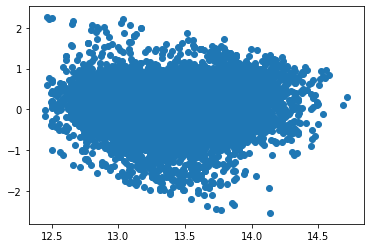

In [11]:
cm_functions.lr_homoscad(model,test_df)

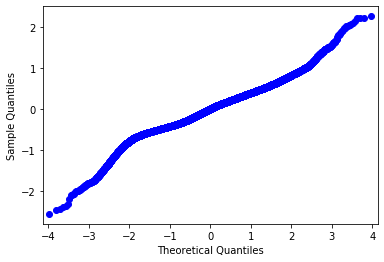

In [12]:
cm_functions.lr_normality(model)

In [19]:
cm_functions.lr_linear(model)

Rainbow statistic: 0.9634339337980258
Rainbow p-value: 0.986507458848668


(0.9634339337980258, 0.986507458848668)